In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
df=pd.read_csv("tested.csv")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
82,974,0,1,"Case, Mr. Howard Brown",male,49.0,0,0,19924,26.0,NaN,S
340,1232,0,2,"Fillbrook, Mr. Joseph Charles",male,18.0,0,0,C.A. 15185,10.5,NaN,S
30,922,0,2,"Louch, Mr. Charles Alexander",male,50.0,1,0,SC/AH 3085,26.0,NaN,S
260,1152,0,3,"de Messemaeker, Mr. Guillaume Joseph",male,36.5,1,0,345572,17.4,NaN,S
186,1078,1,2,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df=df.drop(columns=["PassengerId","Name","Ticket"])

In [7]:
df.value_counts(df["Sex"],normalize=True)

Sex
male      0.636364
female    0.363636
Name: proportion, dtype: float64

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [9]:
df=df.drop("Cabin",axis=1)

In [10]:
df['Age']=df["Age"].fillna(df["Age"].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [11]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
65,1,2,female,30.27259,0,0,21.0000,S
157,1,3,female,23.00000,0,0,7.8542,S
404,0,1,male,43.00000,1,0,27.7208,C
405,0,2,male,20.00000,0,0,13.8625,C
202,0,1,male,47.00000,1,0,227.5250,C
391,1,1,female,51.00000,0,1,39.4000,S
307,0,3,male,0.83000,0,1,9.3500,S
306,0,1,male,30.00000,1,2,151.5500,S
11,0,1,male,46.00000,0,0,26.0000,S
383,1,3,female,19.00000,1,0,16.1000,S


In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [17]:
df["Embarked"].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

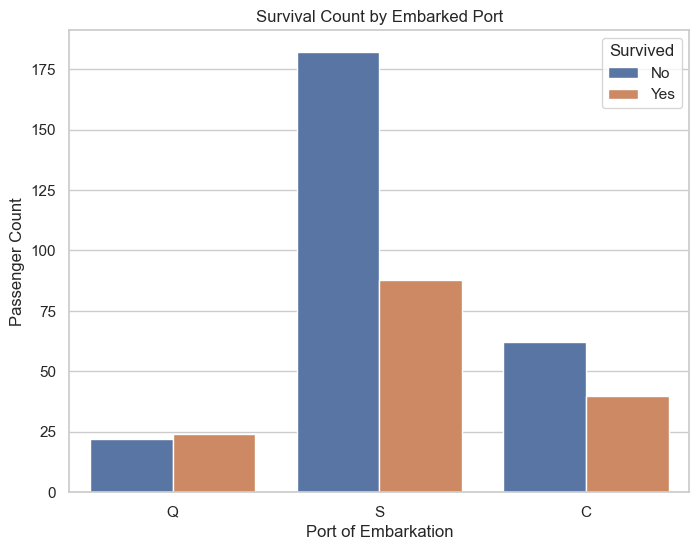

In [33]:
plt.figure(figsize=(8, 6))
sb.set(style="whitegrid")
sb.countplot(data=df, x="Embarked", hue="Survived")
plt.title("Survival Count by Embarked Port")
plt.xlabel("Port of Embarkation")
plt.ylabel("Passenger Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

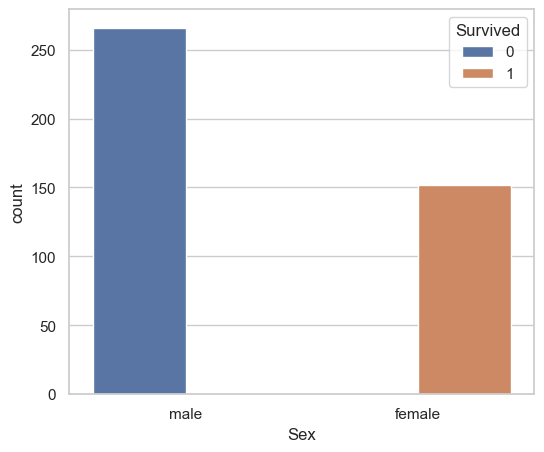

In [37]:
plt.figure(figsize=(6,5))
sb.countplot(data=df, x="Sex", hue="Survived")

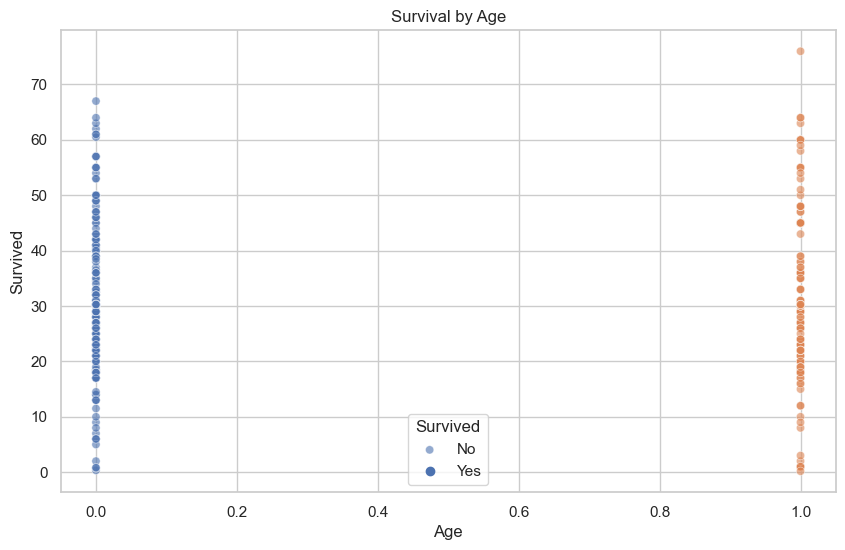

In [40]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=df, y="Age", x="Survived", hue="Survived", alpha=0.6)
plt.title("Survival by Age")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

In [41]:
df['Sex']=df['Sex'].map({"female":0,"male":1})
df=pd.concat([pd.get_dummies(df['Embarked']).astype("int"),df],axis=1).drop("Embarked",axis=1)

In [42]:
df.sample(6)

,C,Q,S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
336,0,0,1,0,2,1,32.00000,0,0,13.0000
406,0,0,1,0,2,1,23.00000,1,0,10.5000
71,0,0,1,0,3,1,21.00000,0,0,7.8958
59,1,0,0,1,1,0,36.00000,0,0,262.3750
89,0,0,1,0,2,1,2.00000,1,1,23.0000
382,0,0,1,1,3,0,30.27259,0,0,14.5000


In [43]:
df['Age']=df['Age'].round()

<Axes: >

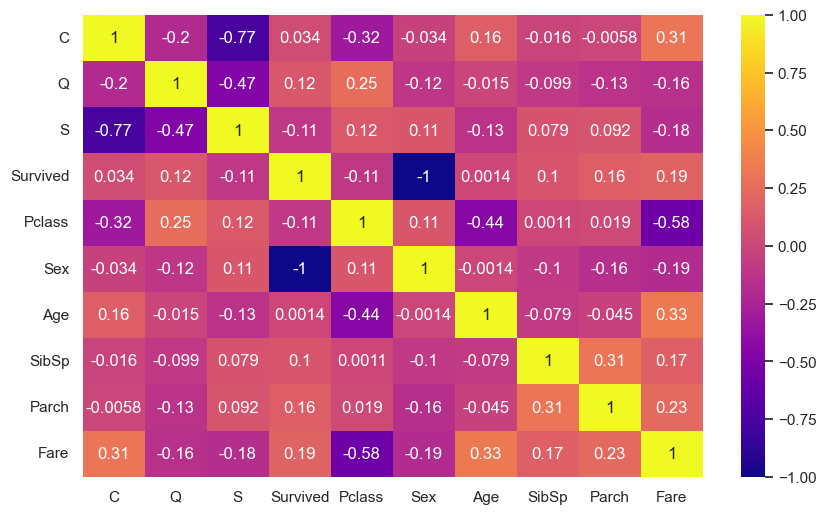

In [44]:
plt.figure(figsize=(10, 6))
sb.heatmap(df.corr(), cmap='plasma', annot=True)

In [45]:
x_train=df.drop(columns=["Survived"])
y_train=df["Survived"]

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,r2_score,confusion_matrix,mean_squared_error

In [47]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,random_state=42,test_size=0.4)

In [49]:
y_train.shape

(250,)

In [50]:
result_dict={0:"Not Survived",1:"Survived"}

In [61]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [62]:
pred=logistic_model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00        61

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



In [63]:
pred=logistic_model.predict(x_train)
mean_squared_error(y_train,pred)

0.0

In [64]:
pred=logistic_model.predict(x_test)
pred2=logistic_model.predict(x_train)
print("accuracy on test set:",accuracy_score(y_test,pred),"\naccuracy on training set:",accuracy_score(y_train,pred2))

accuracy on test set: 1.0 
accuracy on training set: 1.0


In [68]:
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [69]:
pred=knn_model.predict(x_test)
pred2=knn_model.predict(x_train)
print("accuracy on test set:",accuracy_score(y_test,pred),"\naccuracy on training set:",accuracy_score(y_train,pred2))

accuracy on test set: 0.9940476190476191 
accuracy on training set: 0.992


best perameter: 7 
best score: 0.9940476190476191


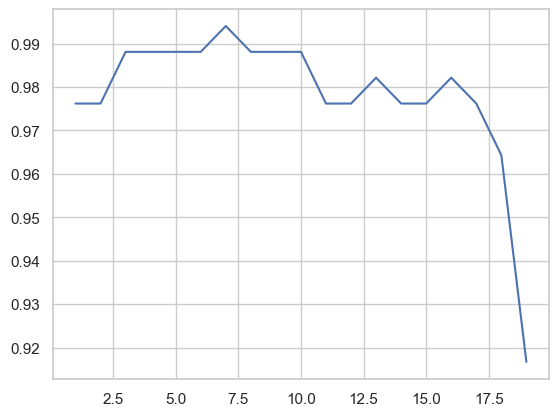

In [67]:
score=[]
hyper=[]
best=0.6
pera=1
for i in range(1,20):
    hyper.append(i)
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    predicted=knn_model.predict(x_test)
    r2=accuracy_score(y_test,predicted)
    score.append(r2)
    if r2>best:
        best=r2
        pera=i
    else:
        continue
print("best perameter:",pera,"\nbest score:",best)
plt.plot(hyper,score);

In [58]:
result_dict[pred[24]]

'Survived'

In [59]:
k=np.array(y_test)

In [60]:
result_dict[k[24]]

'Survived'